#          **Linear Regression Model using EPL soccer  2**



## **Project Overview**



The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game.
With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.




Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems.

 Understanding  and developing  a multiple linear regression model and analyze the changes in the results.

In [2]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure


In [3]:
# Load the data as a data frame by using URL


df = pd.read_csv("EPL_Soccer_MLR_LR.csv")

In [4]:
# check the columns
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## **Data Dictionary**

* PlayerName : Player Name

* Club : Club of the player
  1. MUN:Manchester United F.C.
  2. CHE: Chelsea F.C.
  3. LIV: Liverpool F.C.

* DistanceCovered(InKms): Average Kms distance covered by the player in each game

* Goals: Average Goals per match

* MinutestoGoalRatio: Minutes 

* ShotsPerGame: Average shots taken per game

* AgentCharges: Agent Fees in h

* BMI: Body-Mass index

* Cost: Cost of each player in hundread thousand dollars

* PreviousClubCost: Previous club cost in hundread thousand dollars

* Height: Height of player in cm

* Weight: Weight of player in kg

* Score: Average score per match


In [5]:
# check the shape of the data
df.shape

(202, 13)

The dataset has 202 rows and 13 columns.

## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. 
 
It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.

### **Dataframe Description**
To generate descriptive statistics [pandas.dataframe.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function is used.
 
Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.



In [6]:
# Get basic description of the data, looking the spread of the different variables,
# along with  abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


## **Correlation**
 
The correlation coefficient measures the strength of the relationship between two variables. It indicates that as the value of one variable changes, the other variable changes in a specific direction with some magnitude. There are various ways to find a correlation between two variables, one of which is the Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.
 



### **Graphs of Different Correlation Coefficients**
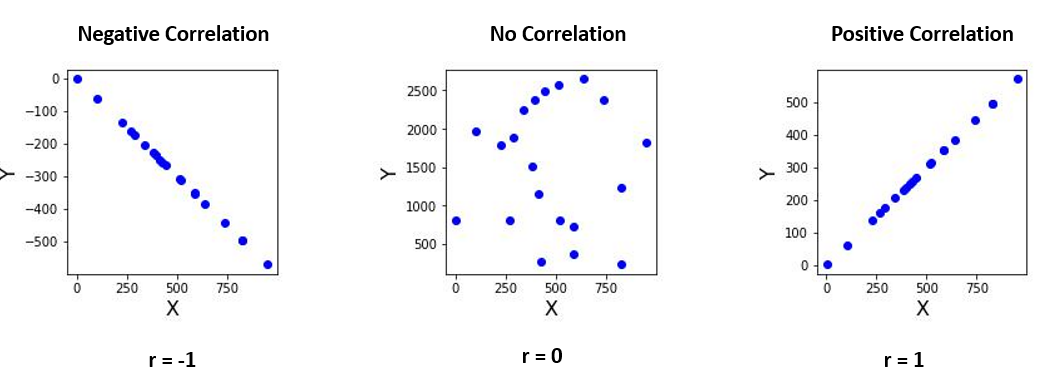

1. $r = -1$ indicates a perfect negative relationship between the variables 

2. $r = 0$ indicates no relationship between the variables

3. $r = 1$ indicates a perfect positive relationship between the variables



In [7]:
#Correlation matrix
corr = df.corr()
corr

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


## **Correlation Heatmap**
 
A correlation heatmap is a heatmap that depicts a two-dimensional correlation matrix between two discrete dimensions, with colored pixels representing data on a color scale. The values of the first dimension are displayed as rows in the table, while the values of the second dimension appear as columns. The cell's hue is proportional to the number of measurements corresponding to the dimensional value.
 
This makes correlation heatmaps great for data analysis since they show differences and variances in the same data while making patterns clearly accessible. A correlation heatmap, like a standard heatmap, is aided by a color bar to make data more legible and understandable.


 
#### **Understanding Heatmap Parameters**
 
Other than data, all other parameters are optional, and data will clearly be the data to be plotted. To build a correlation heatmap, the data must be given using the corr() function.
 
**data: rectangular dataset**
 
2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.
 
**vmin, vmax: floats, optional**
 
Values to anchor the colormap; otherwise, they are inferred from the data and other keyword arguments.
 
**cmap: matplotlib colormap name or object, or list of colors, optional**
 
The mapping from data values to color space. If not provided, the default will depend on whether the center is set.
 
 
**annot: bool or rectangular dataset, optional**
 
If True, write the data value in each cell. If an array-like with the same shape as the data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
 
**square: bool, optional**
 
If True, set the Axes aspect to “equal” so each cell will be square-shaped.
 
 
 
For heatmaps, refer to the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).
 
 
 


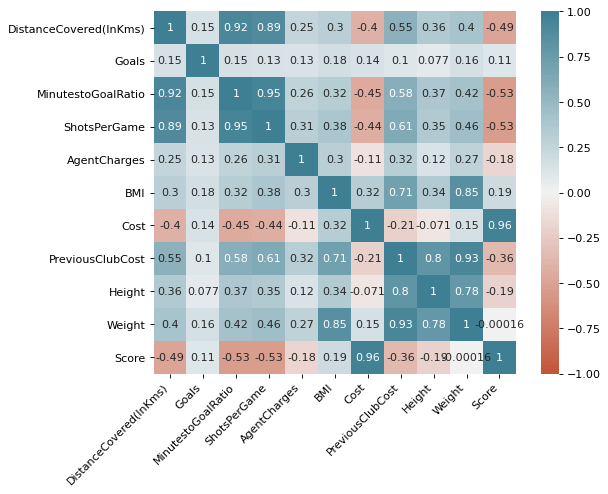

In [8]:
#Colored graph of correlations
plt.figure(figsize=(8, 6), dpi=80)

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); # use xticklabels to rotate labels by 45 degress

#Remove weakly correlated variables
#Weight


#Some highly multicollinear predictors: MinutestoGoalRatio, ShotsPerGame
#Remove MinutestoGoalRatio

#PreviousClubCost, Height, Weight
#Discard height and weight, keep previousclubcost


Let's analyze the correlation scores of variables concerning "Score."
 
* We should remove some weakly correlated variables such as Height and Weight with -0.190 and 0.00016 correlation.
 
* Notice some variables are correlated with each other as well, such as MinutestoGoalRatio and ShotsPerGame. We will take only one of them, ShotsPerGame. What will happen if we include multiple such variables in our model? This is called multicollinearity, and we will be discussing it in detail.



## **Multicollinearity**
 
Some of the independent variables in regression are truly correlated with one another; this is known as multicollinearity, and it is critical to examine these before creating the regression model.
 
When two or more independent continuous variables in a dataset are highly correlated, they can help predict each other and the dependent variable. This makes analyzing the effect of these distinct, independent factors on the goal or dependent variable challenging. The model becomes sensitive to small changes in the data as changes in one multicollinear variable also show an inflated effect on others.
 
 
**How to calculate VIF?** 
 
In the least squares regression models, variance inflation factors (VIFs) evaluate the correlation between independent variables.
We can quantify multicollinearity using **Variance Inflation Factors (VIF)**.
VIF determines the strength of the correlation between the independent variables. It is predicted by regressing a variable against every other variable.
 
To compute the VIFs, all independent variables are converted into dependent variables. Each model generates an R-squared number representing the percentage of variation in the individual IV that the group of IVs explains. As a result, larger R-squared values suggest greater multicollinearity. These R-squared values are used in VIF calculations.
 
$$VIF = \frac{1}{1-R^2}$$ 
 
The more the value of $R^2$ is closer to 1, the more the VIF score tends to infinity. 
 
* VIF starts with one and denotes that the variable does not correlate at all. 
* VIF more than 5-10 can be considered a serious case of multicollinearity and can affect prediction models.
 
 
If two independent variables are too highly correlated $R^2$ > ~0.5, then only one of them should be used in the regression model.


**Ways to handle multicollinearity**
 
* Remove some of the independent variables that are highly connected.
* Linearly combine the independent variables, for example, by adding them all together.
* Conduct a highly correlated variable study and dimensionality reduction techniques, such as principle components analysis or partial least squares regression.
* LASSO and Ridge regression are sophisticated regression analysis techniques that can deal with multicollinearity. You'll be able to manage these analyses with only a little more study if you know how to do linear least squares regression.
 

 


## **Multiple Linear Regression**
 
 
Linear regression, often known as simple regression, creates a relationship between two variables. Linear regression is represented visually as a straight line, with the slope determining how a change in one variable affects a change in the other. A linear regression relationship's y-intercept reflects one variable's value when the other's value is 0.
 
Multiple linear regression estimates the relationship between two or more independent variables and one dependent variable.
$$\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$$
 
where $p$ is... number of features in the model.
 
* For any given independent variable (x) value, y is the dependent variable's predicted value for the dependent variable (y).
* $\beta_0$ represents the intercept, or the predicted value of y, when x is 0.
* $\beta_1$ is the regression coefficient of variable $x_1$, which tells us how much y will change as $x_1$ increases or decreases.
* $\beta_p$is the regression coefficient of the last variable $x_p$, which tells us how much y will change as $x_p$ increases or decreases.
* $x_1$ ... $x_p$ are the independent or predictor variables that help us predict y
* $\epsilon$ is the error left due to the incorrect calculation of the regression coefficients.
 
 

 


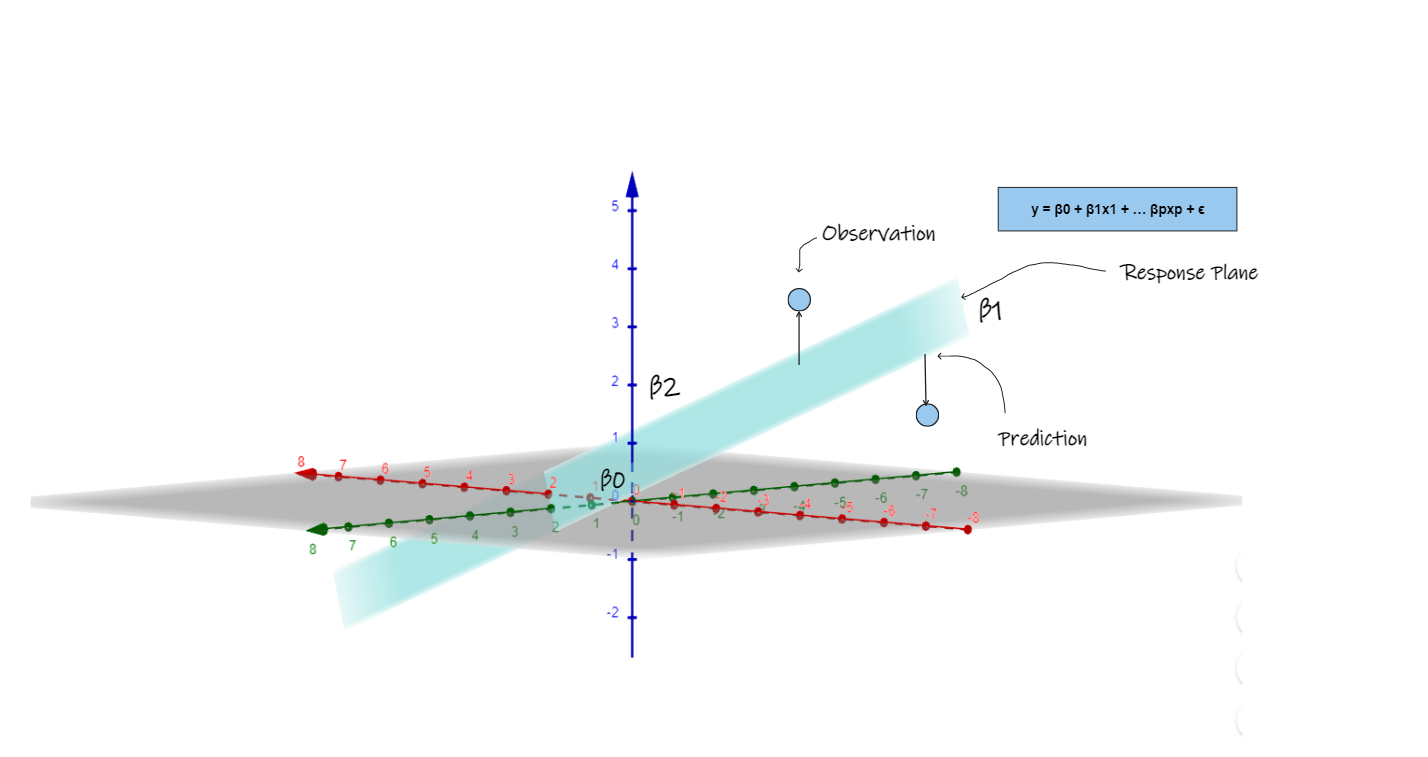

## **Errors in Regression**
 
The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.
 
Let's understand the various errors in Regression:
 
 
* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$
 
* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.
 
$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$
 
 
* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.
 
$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$
 
 
* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.
 
$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

## **Matrix Operations for General Linear Regression**

Matrix operations play a crucial role in the mathematical representation and computation of linear regression. The general linear regression model can be represented as a matrix equation, which allows for efficient computation and manipulation of the model parameters.

Let's consider a linear regression model with $m$ observations and $n$ predictors, where the response variable $y$ is related to the predictor variables $X_1, X_2, ..., X_n$ through the equation:

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$$

Here, $\beta_0, \beta_1, ..., \beta_n$ are the regression coefficients and $\epsilon$ is the error term.

To simplify the computation, we can represent the predictor variables in a design matrix $X$, where each row represents an observation and each column represents a predictor. The response variable $y$ can be represented as a vector. The regression coefficients can be represented as a vector $\beta$.

$$X=
\begin{bmatrix}
1 & X_{11} & X_{12} & ... & X_{1n} \\
1 & X_{21} & X_{22} & ... & X_{2n} \\
... & ... & ... & ... & ... \\
1 & X_{m1} & X_{m2} & ... & X_{mn} \\
\end{bmatrix}$$

$$y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_m
\end{bmatrix}$$

$$\beta = \begin{bmatrix}\beta_0 \\\beta_1 \\... \\\beta_n\end{bmatrix}$$

The goal of linear regression is to find the optimal values of $\beta$ that minimize the sum of squared errors between the observed values of $y$ and the predicted values of $y$. This can be represented as the following optimization problem:
$$\beta^* = \arg\min_{\beta} \left\| y - X\beta \right\|^2$$
This optimization problem can be solved using various methods, such as the least squares method or gradient descent. The solution of this problem provides the optimal values of $\beta$ that best fit the data.




## **Matrix Least Squares**

Matrix Least Squares is a method used to find the optimal values of the coefficients in a linear regression model. The method involves using matrices to perform linear algebra operations to minimize the sum of squares of the residuals (SSE), which measures the discrepancy between the observed and predicted values. The SSE is a measure of the goodness of fit of the model.

The matrix least squares method is based on finding the values of the regression coefficients (β0 and β1, ..., βp) that minimize the sum of squared errors between the observed response variable (Y) and the predicted response variable (Ŷ) given the predictors (X).

The matrix formulation of the linear regression problem is given by the equation:

$$Y = X\beta + \epsilon$$

where $Y$ is a $n$ x $1$ vector of response values, $X$ is a $n$ x $p$ matrix of predictors, $\mathbf{\beta}$ is a $p$ x $1$ vector of regression coefficients, and $\mathbf{\epsilon}$ is a $n$ x $1$ vector of errors.



The total sum of squares (SSTO) measures the total variance in the response variable. It is calculated by summing the squares of the differences between each observed value and the mean of the response variable.
$$SSTO = \sum_{i=1}^n (y_i - \bar{y})^2$$

The regression sum of squares (SSR) measures the explained variance in the response variable by the linear regression model. It is calculated by summing the squares of the differences between the predicted values and the mean of the response variable.
$$SSR = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2$$

The ANOVA (analysis of variance) table provides a summary of the explained and residual variance in the response variable by the linear regression model. The table consists of the following components:

* The regression sum of squares (SSR)
* The residual sum of squares (SSE)
* The total sum of squares (SSTO)

The ANOVA table can be constructed using these values, which provides a summary of the variation in the response variable explained by the predictors, the error, and the total variation in the response variable.




## **Hypothesis Testing**

The ANOVA table can be used to perform hypothesis tests and make inferences about the significance of the independent variables in explaining the variation in the response variable. 
The F-test in linear regression is used to test the null hypothesis that all the coefficients in the model are equal to zero. This test is used to determine whether the model is significant, i.e., whether there is a relationship between the independent variables and the dependent variable. The F-test statistic is calculated as the ratio of the mean squared regression to the mean squared error:

$$F = \frac{MSR}{MSE}$$

Where MSR is the mean squared regression and MSE is the mean squared error. The degrees of freedom for the numerator is equal to the number of independent variables in the model and the degrees of freedom for the denominator is equal to the total number of observations minus the number of independent variables in the model.

The coefficient of multiple determination (R2) measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It is calculated as the ratio of the explained variance (SSR) to the total variance (SSTO):

$$R^2 = \frac{SSR}{SSTO}$$

The adjusted R2 takes into account the number of independent variables in the model and adjusts the R2 to penalize models with a large number of independent variables relative to the number of observations. It is calculated as:

$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

Where n is the total number of observations and p is the number of independent variables in the model.

T-tests are used to test the hypothesis that the coefficients of the independent variables in the model are equal to zero. The t-statistic is calculated as the ratio of the estimate of the coefficient to its standard error:

$$t = \frac{\hat{\beta_j}}{SE(\hat{\beta_j})}$$

Where $\hat{\beta_j}$ is the estimate of the coefficient and $SE(\hat{\beta_j})$ is its standard error. The null hypothesis is that the coefficient is equal to zero, and the alternative hypothesis is that the coefficient is not equal to zero. The p-value is then calculated using the t-distribution with n-p-1 degrees of freedom. If the p-value is less than a predetermined significance level, usually 0.05, the null hypothesis is rejected and the coefficient is considered to be statistically significant.









In [9]:
# Extract predictor variables (remove categorical variables like team)
X = df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y = df['Score']

## **Model Selection Criteria**

The Akaike information criterion (AIC) and the Bayesian information criterion (BIC) provide measures of model performance that account for model complexity. AIC and BIC combine a term reflecting how well the model fits the data with a term that penalizes the model in proportion to its number of parameters.

## **Train - Test Split**

The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.


As we discussed in the notebook for the [previous part](https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/regression_part_1.ipynb) as we increase parameters or variables in the model, it becomes complex.

Complex models can result in overfitting and Simple models can result in underfitting. Let's understand what is the sweet spot that we talked about.

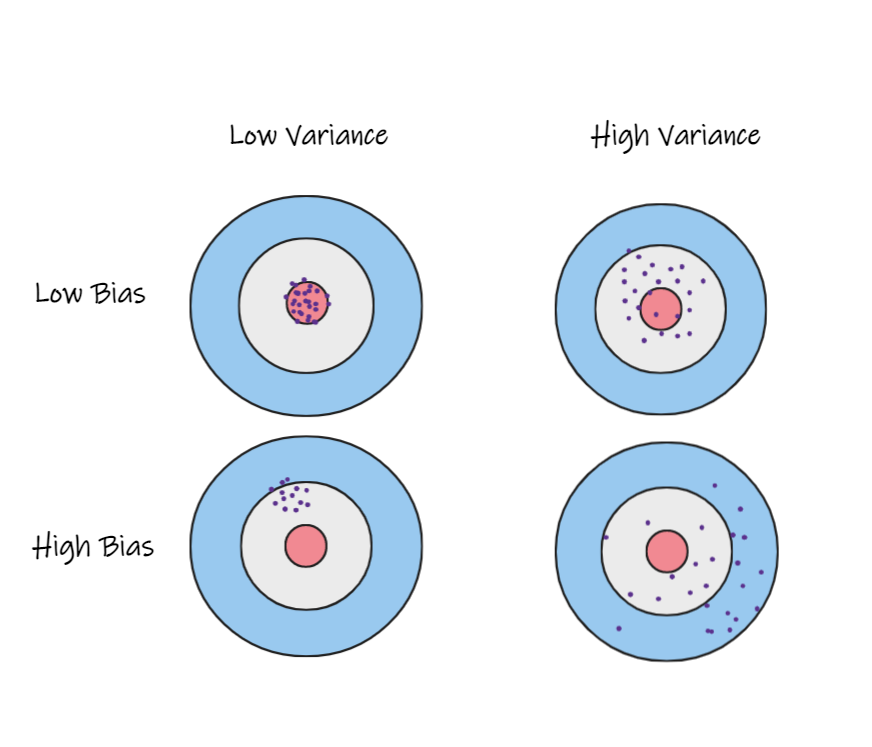

### **Bias - Variance TradeOff**

**Bias**

The bias is defined as the difference between the ML model's prediction of the values and the correct value. Biasing causes a substantial inaccuracy in both training and testing data. To prevent the problem of underfitting, it is advised that an algorithm be low biassed at all times.

The data predicted by high bias is in a straight line format, and hence does not fit correctly in the data set. This type of fitting is known as data underfitting. This occurs when the assumption is overly simple or linear.

**Variance**

The variance of the model is the variability of model prediction for a particular data point, which tells us about the dispersion of our data. The model with large variance has a very complicated fit to the training data and so is unable to fit correctly on new data. As a result, while such models perform exceptionally well on training data, they have substantial error rates on test data.

The model basically tries to memorize the patterns in the training data and performs poorly when unseen data is presented.
When a model has a large variance, this is referred to as Overfitting of Data.


We have to find a sweet spot, a model complexity which returns the minimum or optimal error. This tradeoff is known as Bias - Variance TradeOff.




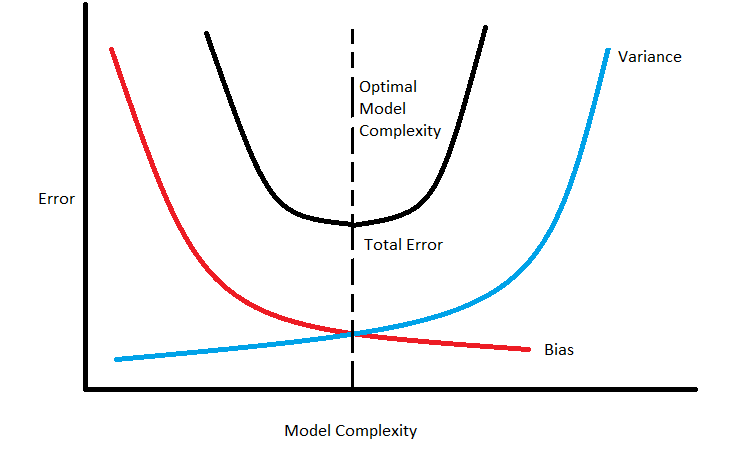

In [10]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [12]:
# Fit the linear regression model
x_train_with_intercept = sm.add_constant(x_train)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           9.69e-96
Time:                        19:46:04   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

We got an $R^2$ of 0.959 which is pretty great and the difference between $R^2$  and Adjusted $R^2$ is not very significant which is also a great sign. Let's try to eliminate some variables and see if we can improve our results.

In [13]:
#Can we trim some variables and see how it performs?
X=df[['DistanceCovered(InKms)'
        , 'BMI', 'Cost',
       'PreviousClubCost']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          9.28e-100
Time:                        19:46:10   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

The AIC and BIC both dropped even though we couldn't see much change in $R^2$. This suggest this model is better than the previous one. Let's see if "Club" information can throw anything else for us. But before that, let's understand the types of data, why is it important to handle categorical data and how can we do so!

## **Types of Data**

**Numerical Data** - Data that is expressed as numbers rather than in any linguistic or descriptive form is referred to as numerical data or quantitative data. These are basically of two types:
* **Discrete** - Discrete data is a sort of numerical data that consists of full, tangible numbers that have particular and definite data values established by counting. For example, number of balloons.

* **Continuous** - Continuous data consists of floating numbers and fluctuating data values taken over a specific time period. For example, temperature.

**Categorical Data** - The data under consideration is described using a finite number of discrete classifications in qualitative or categorical data. In other words, this kind of data cannot be simply measured or tallied using numbers and must instead be categorised. A excellent illustration of this data type is the gender of a person - male, female, or other.

Subcategories under this include the following two:

* **Nominal**
These are the set of values that don’t possess a natural ordering. These are simply naming variables. For example, color. Color variable can be blue, green, black and it does not contain a natural order.

* **Ordinal**
These types of values have a natural ordering while maintaining their class of values. If we consider the size of a clothing brand then we can easily sort them according to their name tag in the order of small < medium < large. The reviewing system in restaurants or hotels can also be considered as an ordinal data type where Excellent service is definitely better than Good service. 

These categories assist us in determining which encoding technique should be used for a given type of data. Because machine learning models are mathematical in nature, it is necessary to translate qualitative input into numerical kinds because they cannot handle these values directly.

Given the smaller number, one-hot encoding, which is comparable to binary coding, can be used for nominal data types where there is no comparison between the categories. For ordinal data types, label encoding, a type of integer encoding, can be used.

## **One - Hot Encoding**

Most Machine Learning algorithms are unable to deal with categorical data and must be transformed to numerical data.
What are our options for converting categorical data to numerical data? Should we number the labels? For example, red represents 0 and blue represents 1. It will cause a bias in the model since the model will consider blue to be superior to red.

To address this, we use a categorical data encoding approach known as one hot encoding. In this method, we build a new feature for each label and assign it a value of 1. For example, if blue is present, it is marked as 1, else it is 0.


### **Dummy Variables**

Pandas get_dummies() converts categorical data into indicator variables. 

**data**: array-like, Series, or DataFrame,
Data of which to get dummy indicators.

**prefix**: str, list of str, or dict of str, default None,
String to append DataFrame column names. 

**drop_first**: bool, default False,
Whether to get k-1 dummies out of k categorical levels by removing the first level.




## **Dummy Variable Trap in Regression Models**

When two or more dummy variables formed using one-hot encoding are significantly connected, the Dummy Variable Trap arises (multi-collinear). 


This indicates that one variable may be inferred from the others, making predicted coefficient variables in regression models difficult to understand.
When you have significant categorical features, one hot encoding them can result in multicollinearity. In other words, due to multicollinearity, the individual influence of the dummy variables on the prediction model cannot be effectively interpreted.



In [15]:
#Let's try throwing in club data using dummy variables
clubs=set(df.Club)
clubs

nominal_features = pd.get_dummies(df['Club'])
nominal_features.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1




We can also use sklearn's **OneHotEncoder** to transform categorical data. The advantage of OneHotEncoder over get_dummies is that a preprocessing object can be stored which fits on the training data and transforms training and unseen data similar to the training data.


## **Data Concatenation**

The pandas concat() function is used to concatenate pandas objects along a particular axis with optional set logic along the other axes. 

**objs**: a sequence or mapping of Series or DataFrame objects

**axis**: {0/’index’, 1/’columns’}, default 0

Here we are concatenating nominal features with our dataframe with axis = 1, which means horizontally.

In [16]:
# concat dummy variables
df_encoded=pd.concat([df,nominal_features], axis=1)
df_encoded.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [18]:
# Run with club encoding
X=df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost','CHE','MUN','LIV']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          1.79e-103
Time:                        19:46:58   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

Including the club feature significantly improved the model as we got $R^2$ as 0.966 and AIC and BIC dropped significantly.

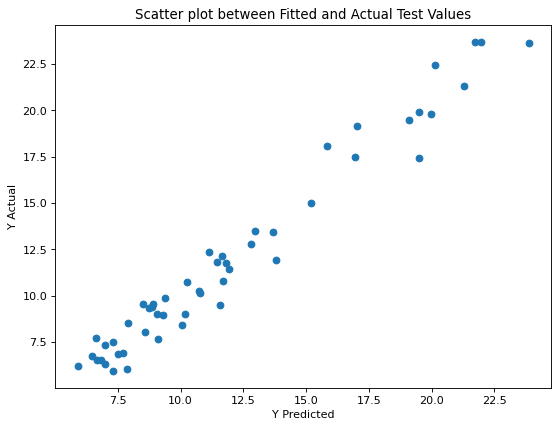

In [19]:
#Look at model plot
plt.figure(figsize=(8, 6), dpi=80)
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


#plot the scatter plot between the fitted values and actual test values for repsonse variable
plt.scatter(y_test_fitted, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Scatter plot between Fitted and Actual Test Values")
plt.show()

We can see the scatter plot shows linear correlation between fitted and actual values!